# Máquinas de Turing (MT)

**Autómatas y Lenguajes Formales**

**Profesor: Fabio Martínez**

**Escuela de Ingeniería de Sistemas e Informática**   

In [0]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/'My Drive'/automatas/notebooks

In [7]:
%cd drive/'My Drive'/automatas/notebooks

/content/drive/My Drive/automatas/notebooks


In [0]:
!pip install automata-lib==1.0.0.post4

In [0]:
from automata.tm.dtm import DTM

## Máquinas de Turing (*TM* )

En eeste taller presentamos la librería [automata](https://pypi.python.org/pypi/automata-lib/1.0.0.post3) de **python 3** permite trabajar con Máquinas de Turing. Típicamente trabaja con máquinas de turing simples, con una sola sinta y una unidad de contral con un único estado. Inicialmente, tenemos que cargar la libreria con el paquete especial _dtm_ que permite manejar y simular las MT. 

### **Ejemplo **

La siguiente máquina de Turing acepta el lenguaje de las cadenas con un número par de ceros sobre el alfabeto:
$\sum = {\{0,1}\}$

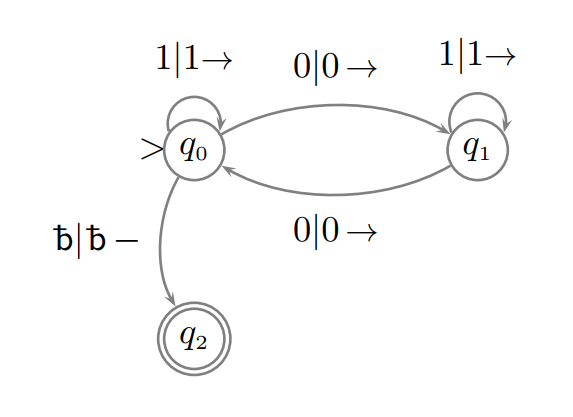

In [8]:
from IPython.display import Image
Image(filename='files/tm_2.png',width=500)

<div style="text-align:center; font-style: italic;" class="image">
<div>Figura. Diagrama de estados de TM que acepta palabras con un número par de ceros</div>
</div>
<br>

A continuación se muestra el esquema de código que representa la máquina de Turing que reconoce palabras que tienen un número par de enteros. Definimos simbolo de cinta, simbolos de entrada, estados y funciones de transición. 

- Las funciones de transición se representan como: 


'q0': {
            '1': ('q0', '1', 'R')
      }
      
      
Que representa $\delta(q_0, 1) = (q_0, 1, ->)$. 

A continuación se muestra el ejemplo implementado. 

In [0]:
dtm2 = DTM(
    states={'q0', 'q1', 'q2'},
    input_symbols={'0', '1'},
    tape_symbols={'0', '1', '.'}, #El punto se usa para limpiar el símbolo de la cinta
    transitions={
        'q0': {
            '1': ('q0', '1', 'R'),
            '0': ('q1', '0', 'R'),
            '.': ('q2', '.', 'R')
        },
        'q1': {
            '0': ('q0', '0', 'R'),
            '1': ('q1', '1', 'R')
        }
    },
    initial_state='q0',
    blank_symbol='.',
    final_states={'q2'}
)

Al igual que con otros autómatas podemos verificar el funcionamiento general de la maquina de turing, como: 

In [0]:
dtm2.validate_input('001')

In [0]:
dtm2.validate_input('100000000001')

También podemos simular la máquina de Turing paso a paso, como descripciones instantaneas. Tal como se muestra a continuación_ 

In [0]:
[(state, tape.copy()) for state, tape in dtm2.validate_input('100000000001', step=True)]


---

### **Ejemplo **

Diseñe una Máquina de Turing que acepte el lenguaje:

$L=\{0^n 1^n \mid n\gt0 \} $

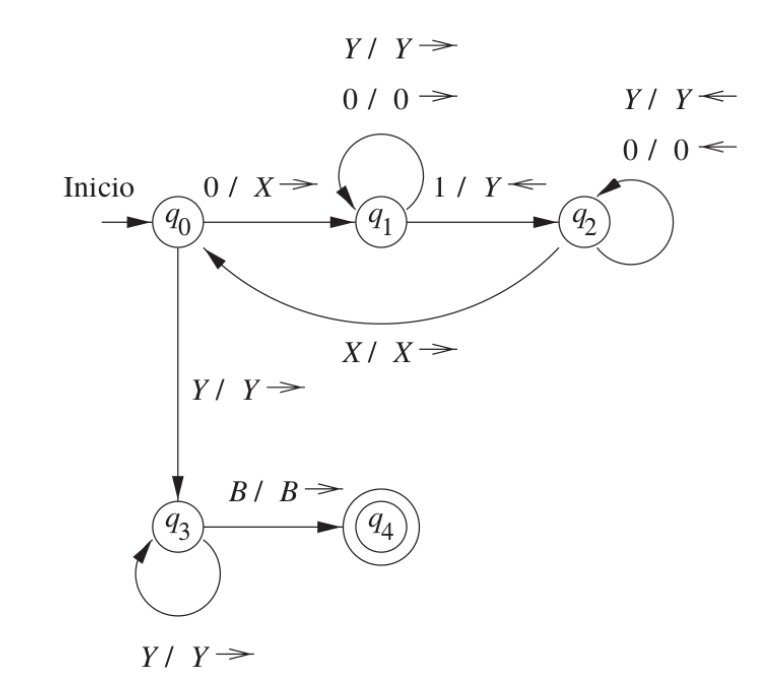

In [9]:
from IPython.display import Image
Image(filename='files/TM_1.png',width=500)

<div style="text-align:center; font-style: italic;" class="image">
<div>Figura 1. Diagrama de estados de TM No.1</div>
</div>
<br>

In [0]:
dtm = DTM(
    states={'q0', 'q1', 'q2', 'q3', 'q4'},
    input_symbols={'0', '1'},
    tape_symbols={'0', '1', 'x', 'y', '.'}, #El punto se usa para limpiar el símbolo de la cinta
    transitions={
        'q0': {
            '0': ('q1', 'x', 'R'),
            'y': ('q3', 'y', 'R')
        },
        'q1': {
            '0': ('q1', '0', 'R'),
            '1': ('q2', 'y', 'L'),
            'y': ('q1', 'y', 'R')
        },
        'q2': {
            '0': ('q2', '0', 'L'),
            'x': ('q0', 'x', 'R'),
            'y': ('q2', 'y', 'L')
        },
        'q3': {
            'y': ('q3', 'y', 'R'),
            '.': ('q4', '.', 'R')
        }
    },
    initial_state='q0',
    blank_symbol='.',
    final_states={'q4'}
)

El método **validate_input** sirve para validar las cadenas 

Si la cadena es aceptada devuelve una tupla que contiene el estado donde se detuvo la máquina

In [0]:
dtm.validate_input('01')


In [0]:
dtm.validate_input('0011')


In [0]:
dtm.validate_input('000111')

In [0]:
[(state, tape.copy()) for state, tape in dtm.validate_input('000111', step=True)]

Si la cadena no es aceptada el método lanza un error

In [0]:
dtm.validate_input('001')

#### **Ejemplo 3**

Construye una máquina de turing que acepta el lenguaje $L=\{a^i b^i c^i :i\geq0 \} $ y que se detiene al procesar todas las entradas. Por consiguiente, $L$ es un lenguaje recursivo pero no $LIC$, es decir $L$ no puede ser aceptado por ningún autómata con pila 

In [0]:
dtm3 = DTM(
)

In [0]:
dtm3.validate_input('aabbcc')

In [0]:
dtm3.validate_input('aaaaaabbbbbbcccccc')

### Ejercicio

Diseñe una máquina de Turing que reconozca el siguiente lenguaje $L= \{ uu^{R} | u \in \{a, b\}^{*} \}$

In [0]:
from automatalib.tm.dtm import DTM
dtm4 = DTM(
)

In [0]:
dtm4.validate_input('Baabbaa')

In [0]:
[(state, tape.copy()) for state, tape in dtm4.validate_input('Baabbaa', step=True)]

[1] Implementación de una Máquina de Turing universal: https://rosettacode.org/wiki/Universal_Turing_machine

[2] Libreria en Python para máquinas de Turing: https://pypi.python.org/pypi/turing_machine